In [12]:
import pandas as pd
import numpy as np

# Dataset generation function
def generate_synthetic_data(num_samples=4000):
    np.random.seed(42)
    
    # Generating synthetic features (SpO2 and HeartRate)
    SpO2 = np.random.uniform(90, 100, num_samples)  # Simulate SpO2 values between 90 and 100
    HeartRate = np.random.uniform(50, 120, num_samples)  # Simulate HeartRate between 50 and 120
    
    # Simulating Labels (0: Normal, 1: Mild Hypoxia, 2: Severe Hypoxia)
    labels = np.random.choice([0, 1, 2], num_samples)
    
    # Create a DataFrame
    data = pd.DataFrame({
        'SpO2': SpO2,
        'HeartRate': HeartRate,
        'Label': labels
    })
    
    # Save to CSV
    data.to_csv('synthetic_data.csv', index=False)
    print("Data saved to 'synthetic_datarsnt.csv'")

generate_synthetic_data()


Data saved to 'synthetic_datarsnt.csv'


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building a simple dense neural network
def build_dense_model(input_shape=(2,), num_classes=3):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax for multi-class classification
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Build and summarize the model
model = build_dense_model(input_shape=(X_train.shape[1],))
model.summary()


NameError: name 'X_train' is not defined

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model
model.save('pulseoximeter-rsnet_model.h5')


NameError: name 'model' is not defined

In [11]:

model.save('pulseoximeter-rsnet_model.h5')
print("pulseoximeter-rsnet_model.h5")

pulseoximeter-rsnet_model.h5


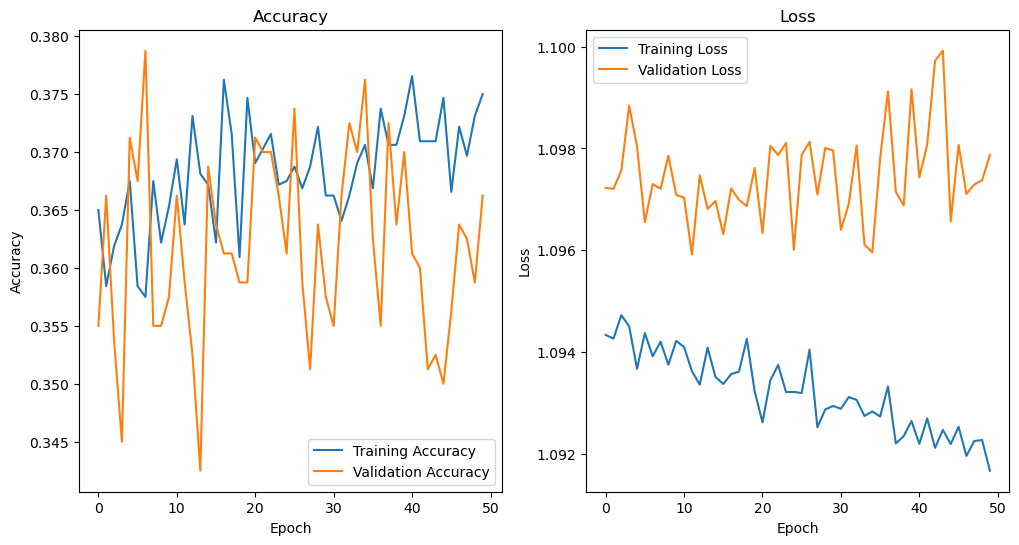

In [12]:
# Plotting Accuracy and Loss graphs
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


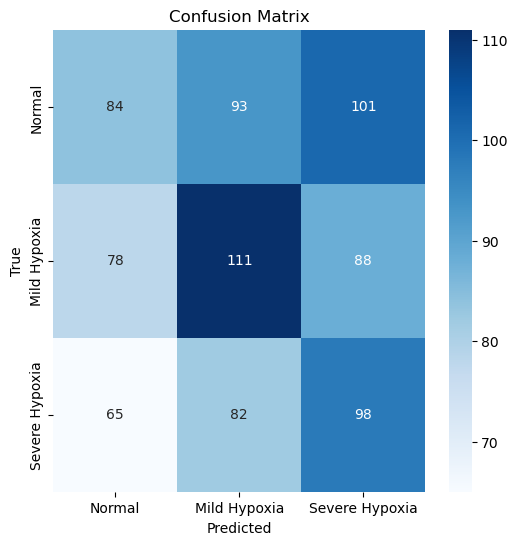

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Mild Hypoxia', 'Severe Hypoxia'], yticklabels=['Normal', 'Mild Hypoxia', 'Severe Hypoxia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [18]:
import numpy as np

# Assuming the trained model and scaler are available

def predict_class(spo2, heart_rate):
    """
    Classify the input SpO2 and Heart Rate values using the trained model.
    
    Args:
        spo2 (float): The SpO2 value entered by the user.
        heart_rate (float): The Heart Rate value entered by the user.
    
    Returns:
        str: The predicted classification (Normal, Mild Hypoxia, or Severe Hypoxia).
    """
    # Preprocess the input (scale it using the same scaler used for training)
    input_data = np.array([[spo2, heart_rate]])  # Shape (1, 2)
    input_data_scaled = scaler.transform(input_data)  # Scaling using the fitted scaler
    
    # Predict the class (Normal, Mild Hypoxia, Severe Hypoxia)
    prediction = model.predict(input_data_scaled)
    predicted_class = np.argmax(prediction, axis=-1)  # Get the class index
    
    # Map the predicted class to the corresponding label
    class_labels = {0: "Normal", 1: "Mild Hypoxia", 2: "Severe Hypoxia"}
    predicted_label = class_labels[predicted_class[0]]
    
    return predicted_label

# Get user input for SpO2 and Heart Rate
spo2_input = float(input("Enter SpO2 (Oxygen Saturation) value: "))
heart_rate_input = float(input("Enter Heart Rate (beats per minute): "))

# Classify the input
prediction = predict_class(spo2_input, heart_rate_input)
print(f"The predicted classification is: {prediction}")


Enter SpO2 (Oxygen Saturation) value: 89
Enter Heart Rate (beats per minute): 120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The predicted classification is: Normal
